![Quora-1.png](attachment:Quora-1.png)

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

In [2]:
import nltk
#nltk.download('averaged_perceptron_tagger')
sent='How do I read and find my YouTube comments?'
nltk.pos_tag(nltk.word_tokenize(sent))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('How', 'WRB'),
 ('do', 'VBP'),
 ('I', 'PRP'),
 ('read', 'VB'),
 ('and', 'CC'),
 ('find', 'VB'),
 ('my', 'PRP$'),
 ('YouTube', 'NN'),
 ('comments', 'NNS'),
 ('?', '.')]

In [4]:
sent = "How can I be a good geologist?"
nltk.pos_tag(nltk.word_tokenize(sent))

[('How', 'WRB'),
 ('can', 'MD'),
 ('I', 'PRP'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('geologist', 'NN'),
 ('?', '.')]

In [5]:
sent = "What should I do to be a great geologist?"
nltk.pos_tag(nltk.word_tokenize(sent))

[('What', 'WP'),
 ('should', 'MD'),
 ('I', 'PRP'),
 ('do', 'VB'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('geologist', 'NN'),
 ('?', '.')]

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

<h2> 3.1 Reading data and basic stats </h2>

In [51]:
df = pd.read_csv("train.csv")
print("Number of data points:",df.shape[0])

Number of data points: 404290


In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df_1 = df[df['is_duplicate'] ==1]

In [8]:
df_1.shape

(149263, 6)

In [9]:
df_1.head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [34]:
#df_1['qid1'].value_counts(sort=False)

In [10]:
from collections import defaultdict
#dict(zip(x,y))
#{k: g["value"].tolist() for k,g in ptest.groupby("id")}
orDict = defaultdict(list) 
  
# iterating over list of tuples 
for key, val in zip(df_1['qid1'].values,df_1['qid2'].values): 
    orDict[key].append(val) 
    orDict[val].append(key) 
  
  
#print(dict(orDict))

In [11]:
que1 = dict(zip(df_1['qid1'].values,df_1['question1'].values))
len (que1)

86197

In [12]:
que2 = dict(zip(df_1['qid2'].values,df_1['question2'].values))
len (que2)

86089

In [13]:
questions = {**que1 ,**que2}

In [14]:
len (questions)

149650

In [15]:
#df[df['is_duplicate']==0][['question1','question2']]
len(orDict)

149650

In [16]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle

In [17]:
di = nx.Graph(orDict)

In [19]:
#nx.draw(di,with_labels=True)

In [18]:
unq_id = set (df_1['qid1'].values).union (set(df_1['qid2'].values))

In [19]:
print (len (unq_id))

149650


In [20]:
lst1 = []   
while len(unq_id)>0:
    #lst = list()
    k = unq_id.pop()
    lst = list (nx.algorithms.bfs_tree(di,k).edges())
    set1 = set()
    for i in lst:
        set1.update(i)
    ven =list(set1)
    for i in range((len(ven))):
        for j in range(i+1,len(ven)):
            lst1.append([ven[i],ven[j]])
    unq_id = unq_id.difference(set1)

In [21]:
len (lst1)

228548

In [41]:
data = pd.DataFrame(lst1,columns=['qid1','qid2'])

In [42]:
data.shape

(228548, 2)

In [43]:
data.duplicated().sum()

0

In [44]:
data.head()

,qid1,qid2
0,524293,524294
1,11,12
2,16,15
3,304060,304061
4,304060,524303


In [45]:
data['is_duplicate'] = 1

In [46]:
data.shape

(228548, 3)

In [47]:
data['question1'] = data['qid1'].map(questions)
data['question2'] = data['qid2'].map(questions)

In [48]:
data.head()

,qid1,qid2,is_duplicate,question1,question2
0,524293,524294,1,Are there some chess clubs in India?,Is there any chess club in India?
1,11,12,1,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
2,16,15,1,What should I do to be a great geologist?,How can I be a good geologist?
3,304060,304061,1,What are things you can do to keep yourself mo...,How do you keep yourself motivated through out...
4,304060,524303,1,What are things you can do to keep yourself mo...,What one thing you do in a day to keep yoursel...


In [52]:
neg_data = df[df['is_duplicate'] ==0]

In [53]:
neg_data.drop(columns =['id'],axis=1,inplace=True)

In [54]:
neg_data.shape

(255027, 5)

In [57]:
final_data = pd.concat([data,neg_data], ignore_index=True)

In [58]:
final_data.shape

(483575, 5)

In [59]:
final_data.head()

,is_duplicate,qid1,qid2,question1,question2
0,1,524293,524294,Are there some chess clubs in India?,Is there any chess club in India?
1,1,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
2,1,16,15,What should I do to be a great geologist?,How can I be a good geologist?
3,1,304060,304061,What are things you can do to keep yourself mo...,How do you keep yourself motivated through out...
4,1,304060,524303,What are things you can do to keep yourself mo...,What one thing you do in a day to keep yoursel...


In [60]:
final_data['is_duplicate'].value_counts()

0    255027
1    228548
Name: is_duplicate, dtype: int64

In [61]:
df = final_data.copy()

We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

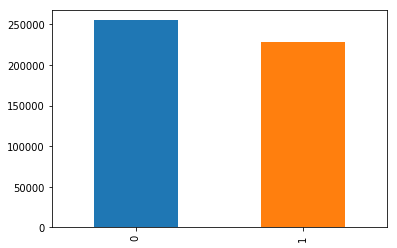

In [62]:
df['is_duplicate'].value_counts().plot.bar()

In [63]:
df['is_duplicate'].value_counts()

0    255027
1    228548
Name: is_duplicate, dtype: int64

In [64]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   52.74%

~> Question pairs are Similar (is_duplicate = 1):
   47.26%


<h3> 3.2.2 Number of unique questions </h3>

In [65]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

In [67]:
#qids.value_counts()

In [68]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 117898 (21.916855816616568%)

Max number of times a single question is repeated: 226



<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 226



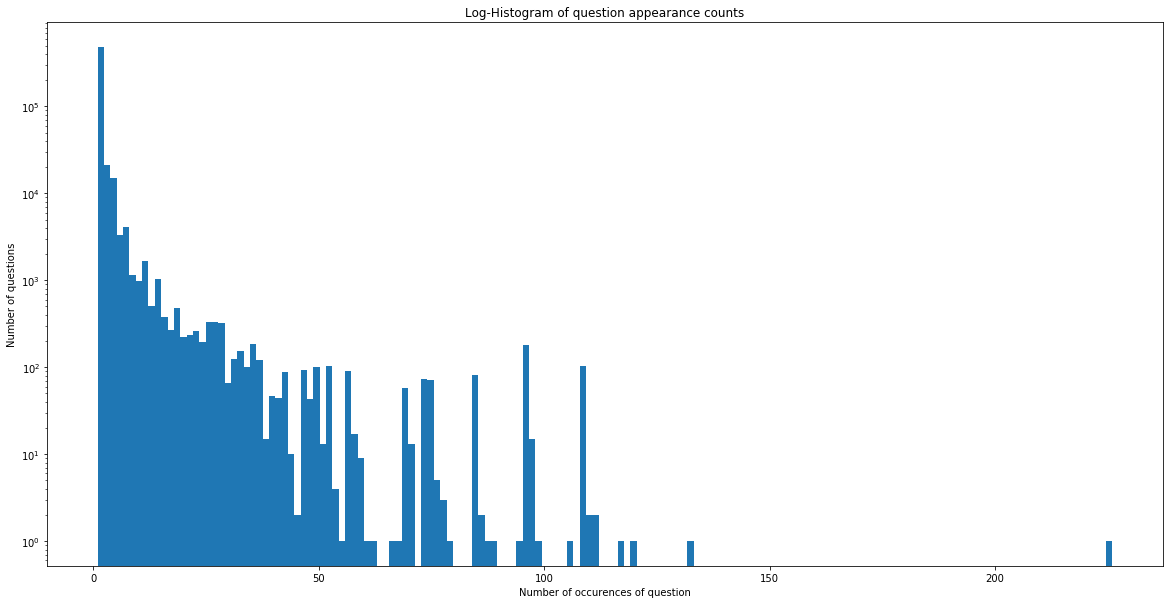

In [76]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

<h3> 3.2.5 Checking for NULL values </h3>

In [77]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

        is_duplicate    qid1    qid2                         question1  \
294967             0  174363  174364    How can I develop android app?   
355237             0  303951  174364  How can I create an Android app?   
456914             0  493340  493341                               NaN   

                                                question2  
294967                                                NaN  
355237                                                NaN  
456914  My Chinese name is Haichao Yu. What English na...  


- There are two rows with null values in question2 

In [78]:
# Filling the null values with ' '
df = df.dropna()
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [is_duplicate, qid1, qid2, question1, question2]
Index: []


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [79]:
if os.path.isfile('df_fe_without_preprocessing_train1.csv'):
    print ('It is there in the files')
    df = pd.read_csv("df_fe_without_preprocessing_train1.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    #df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)
    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train1.csv", index=False)

df.head()

,is_duplicate,qid1,qid2,question1,question2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,freq_q1+q2,freq_q1-q2
0,1,524293,524294,Are there some chess clubs in India?,Is there any chess club in India?,1,1,36,33,7,7,0.285714,2,0
1,1,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,1,86,90,16,16,0.258065,2,0
2,1,16,15,What should I do to be a great geologist?,How can I be a good geologist?,1,1,41,30,9,7,0.250000,2,0
3,1,304060,304061,What are things you can do to keep yourself mo...,How do you keep yourself motivated through out...,2,1,77,61,13,11,0.208333,3,1
4,1,304060,524303,What are things you can do to keep yourself mo...,What one thing you do in a day to keep yoursel...,2,2,77,58,13,12,0.240000,4,0


<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [80]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 66
Number of Questions with minimum length [question2] : 22


In [84]:
df = df[df['q1_n_words']>1]

In [86]:
df = df[df['q2_n_words']>1]

In [87]:
df.shape

(483484, 14)

<h4> 3.3.1.1 Feature: word_share </h4>

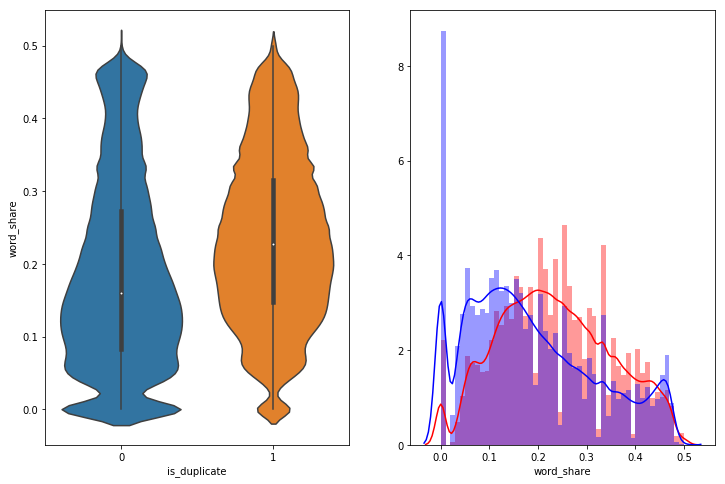

In [88]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>

In [114]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [110]:
q1_words = set([word for word in df['question1'][0].split() if word  in STOP_WORDS])
q2_words = set([word for word in df['question2'][0].split() if word  in STOP_WORDS])
print (q1_words)
print (q2_words)

{'there', 'in', 'some', 'are'}
{'there', 'any', 'in', 'is'}


In [111]:
common_word_count = q1_words.intersection(q2_words)
common_word_count    

{'in', 'there'}

In [112]:
set(df['question1'][0].split()).intersection(set(STOP_WORDS)).intersection(set(df['question2'][0].split()).intersection(set(STOP_WORDS)))

{'in', 'there'}

In [113]:
set(df['question1'][0].split()).difference(set(STOP_WORDS)).intersection(set(df['question2'][0].split()).difference(set(STOP_WORDS)))

{'chess', 'india'}

In [115]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    stop = set(STOP_WORDS)

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    #q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    #q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    q1_words = (set (q1_tokens)).difference(stop)
    q2_words = (set (q2_tokens)).difference(stop)
    
    #Get the stopwords in Questions
    #q1_words = set (q1_tokens).difference(stop)
    #q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    #q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    q1_stops = (set (q1_tokens)).intersection(stop)
    q2_stops = (set (q2_tokens)).intersection(stop)
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    # Get the common Tokens from Question pair
    common_token_count = len(set (q1_tokens).intersection(set (q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)

    
    return df

In [120]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [121]:
if os.path.isfile('nlp_features_train1.csv'):
    print ('It is there in files')
    df2 = pd.read_csv("nlp_features_train1.csv",encoding='latin-1')
    df2.fillna('')
else:
    print("Extracting features for train:")
    #df = pd.read_csv("train.csv")
    df2 = extract_features(df)
    df2.to_csv("nlp_features_train1.csv", index=False)
df2.head(2)

Extracting features for train:
token features...


,is_duplicate,qid1,qid2,question1,question2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio
0,1,524293,524294,are there some chess clubs in india,is there any chess club in india,1,1,36,33,7,...,0.571420,0.571420,1,0,0,7.0,84,87,81,85
1,1,11,12,astrology i am a capricorn sun cap moon and c...,i am a triple capricorn sun moon and ascenda...,1,1,86,90,16,...,0.705878,0.705878,1,0,0,17.0,81,77,73,73


In [129]:
df.columns

Index(['is_duplicate', 'qid1', 'qid2', 'question1', 'question2', 'freq_qid1',
       'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share',
       'freq_q1+q2', 'freq_q1-q2', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio'],
      dtype='object')

In [131]:
df.shape

(483484, 29)

In [ ]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savez('train_p.txt', p, delimiter=' ', fmt='%s')
np.savez('train_n.txt', n, delimiter=' ', fmt='%s')

In [27]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 3335825


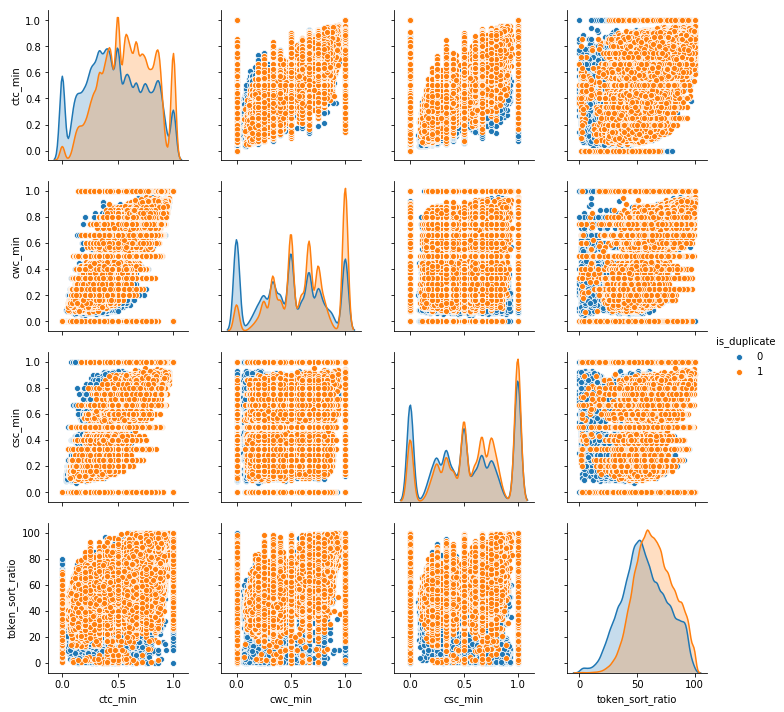

In [138]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
#from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
#import spacy

In [141]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [142]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [232]:
#stop_words = set(stopwords.words('english'))
#stop_words
df2 = pd.read_csv("nlp_features_train1.csv")

In [205]:
df2.drop([ 'qid1','qid2','question1','question2','is_duplicate'], axis=1, inplace=True)

In [233]:
y = df2['is_duplicate']

In [234]:
df2.drop([ 'is_duplicate'], axis=1,inplace =True)

In [224]:
y.shape

(483484,)

In [196]:
df2['is_duplicate'].value_counts()

0    254938
1    228546
Name: is_duplicate, dtype: int64

In [235]:
from sklearn.model_selection import train_test_split
# split the data set into train and test
que1_train, que1_test, y_train, y_test = train_test_split(df2,y, 
                                                             test_size=0.30, random_state=42)


In [226]:
que1_train.columns

Index(['qid1', 'qid2', 'question1', 'question2', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share',
       'freq_q1+q2', 'freq_q1-q2', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [227]:
Counter(y_train)

Counter({0: 178493, 1: 159945})

In [228]:
Counter(y_test)

Counter({0: 76445, 1: 68601})

In [203]:
que2_train, que2_test = train_test_split(df2['question2'].values, 
                                                             test_size=0.30, random_state=42)


In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
#questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer()
tfidf_que1 = tfidf.fit_transform(que1_train['question1'])
tfidf1 = TfidfVectorizer()
tfidf_que2 = tfidf1.fit_transform(que1_train['question2'])

test1 = tfidf.transform(que1_test['question1'])
test2 = tfidf1.transform(que1_test['question2'])

# dict key:word and value:tf-idf score
#word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [238]:
tfidf_que1.shape

(338438, 58436)

In [239]:
que1_train.drop([ 'qid1','qid2','question1','question2'], axis=1, inplace=True)
que1_test.drop([ 'qid1','qid2','question1','question2'], axis=1, inplace=True)

In [169]:
df2.columns

Index(['is_duplicate', 'qid1', 'qid2', 'question1', 'question2', 'freq_qid1',
       'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share',
       'freq_q1+q2', 'freq_q1-q2', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [149]:
df2.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,freq_q1+q2,freq_q1-q2,cwc_min,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,1,1,36,33,7,7,0.285714,2,0,0.666644,...,0.571420,1,0,0,7.0,84,87,81,85,0.323529
1,1,1,86,90,16,16,0.258065,2,0,0.666656,...,0.705878,1,0,0,17.0,81,77,73,73,0.160920
2,1,1,41,30,9,7,0.250000,2,0,0.499975,...,0.444440,1,0,2,8.0,71,55,61,67,0.354839
3,2,1,77,61,13,11,0.208333,3,1,0.499988,...,0.384612,0,0,2,12.0,67,66,51,59,0.403226
4,2,2,77,58,13,12,0.240000,4,0,0.399992,...,0.538457,0,1,1,12.5,80,78,71,81,0.474576


In [150]:
df2.shape

(483484, 24)

In [156]:
df3.shape

(483572, 9)

In [179]:
feat_train, feat_test = train_test_split(df2,test_size=0.30, random_state=42,shuffle=False)


In [152]:
df3 = pd.read_csv("df_fe_without_preprocessing_train1.csv",encoding='latin-1')
#df3.head(2)

In [173]:
feat_train.shape

(338438, 29)

In [174]:
tfidf_que1.shape

(338438, 50344)

In [175]:
tfidf_que2.shape

(338438, 47055)

In [154]:
df3.drop([ 'qid1','qid2','question1','question2','is_duplicate'], axis=1, inplace=True)
feat_train1, feat_test1 = train_test_split(df3,test_size=0.30, random_state=42,shuffle=False)

In [258]:
from scipy.sparse import hstack
#stack_data = hstack((feat_train,feat_train1))
train_data = hstack((que1_train,tfidf_que1))
Xtrain_data = hstack((train_data,tfidf_que2))

In [259]:
#stack_data1 = hstack((feat_test,feat_test1))
test_data = hstack((que1_test,test1))
Xtest_data = hstack((test_data,test2))

In [260]:
Xtrain_data.shape

(338438, 112514)

In [243]:
Xtest_data.shape

(145046, 112514)

In [244]:
from collections import Counter
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.527402360255054 Class 1:  0.4725976397449459
---------- Distribution of output variable in train data ----------
Class 0:  0.4729603022489417 Class 1:  0.4729603022489417


In [245]:
Counter(y_test)

Counter({0: 76445, 1: 68601})

In [246]:
Counter(y_train)

Counter({0: 178493, 1: 159945})

In [247]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Log loss on Test Data using Random Model 0.8840843744628937


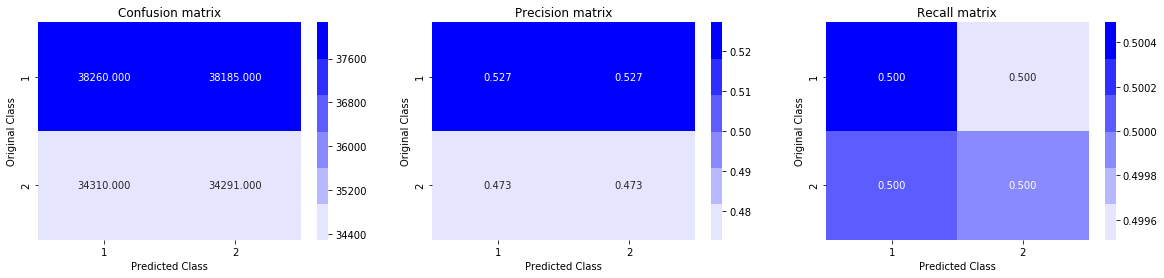

In [248]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [249]:
from sklearn.preprocessing import StandardScaler
#standardizing the bag of words
standardizing  = StandardScaler(with_mean = False)
Xtrain_data = standardizing.fit_transform(Xtrain_data)
Xtrain_data.shape

(338438, 112514)

In [250]:
Xtest_data = standardizing.transform(Xtest_data)

For values of alpha =  1e-05 The log loss is: 0.5299904924096178
For values of alpha =  0.0001 The log loss is: 0.5312602403808597
For values of alpha =  0.001 The log loss is: 0.529921979480284
For values of alpha =  0.01 The log loss is: 0.47525365686848287
For values of alpha =  0.1 The log loss is: 0.41000540152739917
For values of alpha =  1 The log loss is: 0.42113941897910534
For values of alpha =  10 The log loss is: 0.4423104314877162


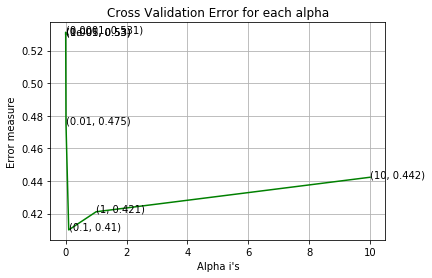

For values of best alpha =  0.1 The train log loss is: 0.3185907425348261
For values of best alpha =  0.1 The test log loss is: 0.41000540152739917
Total number of data points : 145046


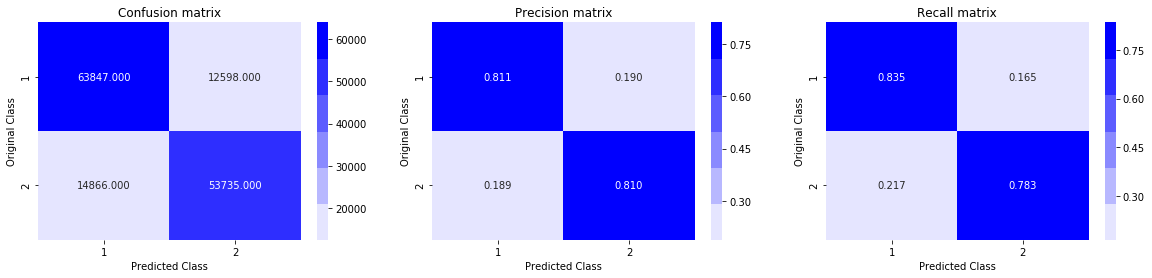

In [251]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(Xtrain_data, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(Xtrain_data, y_train)
    predict_y = sig_clf.predict_proba(Xtest_data)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(Xtrain_data, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(Xtrain_data, y_train)

predict_y = sig_clf.predict_proba(Xtrain_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(Xtest_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.5450577281595378
For values of alpha =  0.0001 The log loss is: 0.5561861319757093
For values of alpha =  0.001 The log loss is: 0.6296179770028739
For values of alpha =  0.01 The log loss is: 0.6880487504386533
For values of alpha =  0.1 The log loss is: 0.6915518682116507
For values of alpha =  1 The log loss is: 0.6916842401688336
For values of alpha =  10 The log loss is: 0.6916867012913885


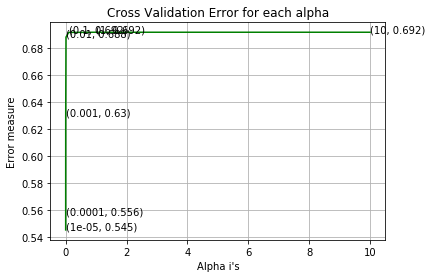

For values of best alpha =  1e-05 The train log loss is: 0.4898424798834351
For values of best alpha =  1e-05 The test log loss is: 0.5450577281595378
Total number of data points : 145046


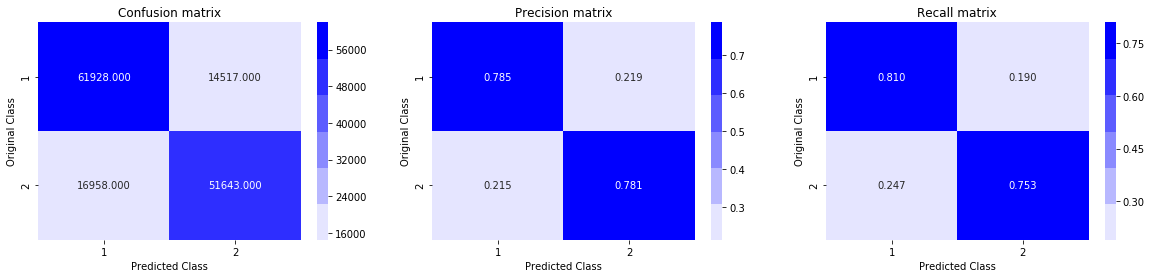

In [252]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='log', random_state=42)
    clf.fit(Xtrain_data, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(Xtrain_data, y_train)
    predict_y = sig_clf.predict_proba(Xtest_data)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='log', random_state=42)
clf.fit(Xtrain_data, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(Xtrain_data, y_train)

predict_y = sig_clf.predict_proba(Xtrain_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(Xtest_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.5293140416169675
For values of alpha =  0.0001 The log loss is: 0.5296594913733553
For values of alpha =  0.001 The log loss is: 0.5257569922507528
For values of alpha =  0.01 The log loss is: 0.48881708987711225
For values of alpha =  0.1 The log loss is: 0.42586881829747103
For values of alpha =  1 The log loss is: 0.4224269929144135
For values of alpha =  10 The log loss is: 0.44841787115356563


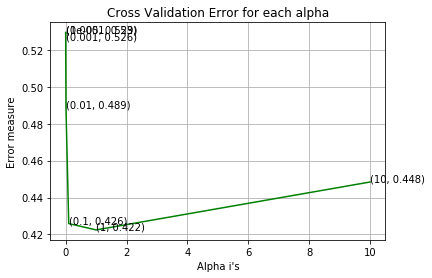

For values of best alpha =  1 The train log loss is: 0.36525183326479144
For values of best alpha =  1 The test log loss is: 0.42113941897910534
Total number of data points : 145046


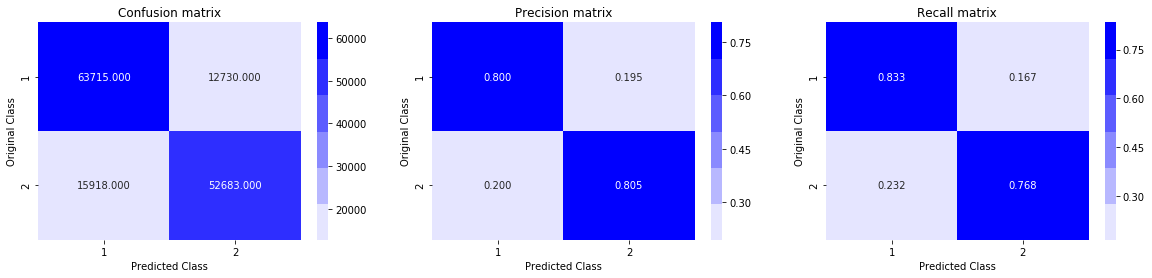

In [253]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(Xtrain_data, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(Xtrain_data, y_train)
    predict_y = sig_clf.predict_proba(Xtest_data)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(Xtrain_data, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(Xtrain_data, y_train)

predict_y = sig_clf.predict_proba(Xtrain_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(Xtest_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.5445291120611463
For values of alpha =  0.0001 The log loss is: 0.5559318312908051
For values of alpha =  0.001 The log loss is: 0.6341806928714654
For values of alpha =  0.01 The log loss is: 0.6870746777551177
For values of alpha =  0.1 The log loss is: 0.6915811050485434
For values of alpha =  1 The log loss is: 0.6916856372568833
For values of alpha =  10 The log loss is: 0.6916861467834975


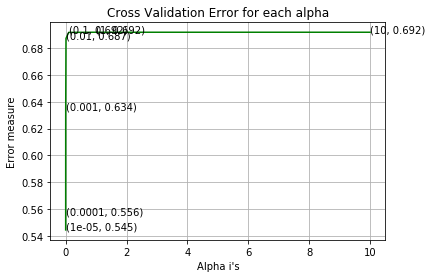

For values of best alpha =  1e-05 The train log loss is: 0.4892630249775278
For values of best alpha =  1e-05 The test log loss is: 0.5445291120611463
Total number of data points : 145046


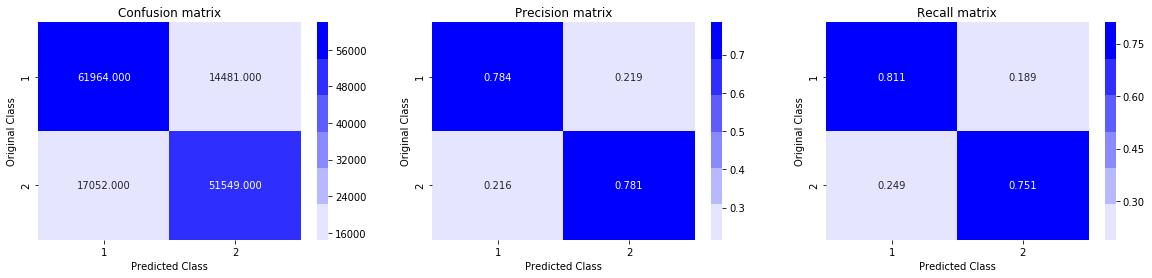

In [254]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(Xtrain_data, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(Xtrain_data, y_train)
    predict_y = sig_clf.predict_proba(Xtest_data)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(Xtrain_data, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(Xtrain_data, y_train)

predict_y = sig_clf.predict_proba(Xtrain_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(Xtest_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [38]:
df1.head(2)

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,...,16.165592,33.030668,7.019996,-14.793959,15.437511,8.199658,-25.070834,1.571619,1.603738,0.305645
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,...,-4.901128,-4.565393,41.520751,-0.727564,-16.413776,-7.373778,2.638877,-7.403457,2.703070,0.408040


In [40]:
df1.drop([ 'id','is_duplicate'], axis=1, inplace=True)

In [43]:
df1.head(2)

,Unnamed: 0,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,...,16.165592,33.030668,7.019996,-14.793959,15.437511,8.199658,-25.070834,1.571619,1.603738,0.305645
1,1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,...,-4.901128,-4.565393,41.520751,-0.727564,-16.413776,-7.373778,2.638877,-7.403457,2.703070,0.408040


In [44]:
df1.columns

Index(['Unnamed: 0', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       ...
       '374_y', '375_y', '376_y', '377_y', '378_y', '379_y', '380_y', '381_y',
       '382_y', '383_y'],
      dtype='object', length=795)

In [45]:
df1.drop([ 'Unnamed: 0'], axis=1, inplace=True)

In [48]:
df1.shape

(404290, 794)

In [49]:
y_train.shape

(283003,)

In [52]:
#Xtrain_data, Xtest_data = train_test_split(df1,test_size=0.30, random_state=42,shuffle=False)
k = int (404290*0.7)
Xtrain_data = df1[0:k]
Xtest_data = df1[k:-1]

In [57]:
from sklearn.preprocessing import StandardScaler
#standardizing the bag of words
standardizing  = StandardScaler(with_mean = False)
Xtrain_data = standardizing.fit_transform(Xtrain_data)
Xtest_data = standardizing.transform(Xtest_data)

In [257]:
y_train.dtypes

dtype('int64')

In [39]:
best_params = rs_clf.best_params_
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best params: 
learning_rate: 0.2
max_depth: 9
n_estimators: 500
silent: True
verbosity: 0


In [264]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.22
params['n_estimators'] = 500
params['silent'] = 1
params['max_depth'] = 9
params['nthread'] = -1

d_train = xgb.DMatrix(Xtrain_data, label=y_train)
d_test = xgb.DMatrix(Xtest_data, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(Xtrain_data,y_train)
predict_y = bst.predict(d_test)

[0]	train-logloss:0.577892	valid-logloss:0.579225
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.307298	valid-logloss:0.319579
[20]	train-logloss:0.279013	valid-logloss:0.296455
[30]	train-logloss:0.268554	valid-logloss:0.28976
[40]	train-logloss:0.262132	valid-logloss:0.286073
[50]	train-logloss:0.255881	valid-logloss:0.282987
[60]	train-logloss:0.251839	valid-logloss:0.281301
[70]	train-logloss:0.247518	valid-logloss:0.279468
[80]	train-logloss:0.243947	valid-logloss:0.277776
[90]	train-logloss:0.240773	valid-logloss:0.276431
[100]	train-logloss:0.238416	valid-logloss:0.275599
[110]	train-logloss:0.235692	valid-logloss:0.274549
[120]	train-logloss:0.233615	valid-logloss:0.273838
[130]	train-logloss:0.230948	valid-logloss:0.272941
[140]	train-logloss:0.229336	valid-logloss:0.272359
[150]	train-logloss:0.226918	valid-logloss:0.271569
[160]	train-logloss:0.225248	

In [265]:
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

The test log loss is: 0.2621512816927984


In [267]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predict_y)

0.9564632139285741

Total number of data points : 145046


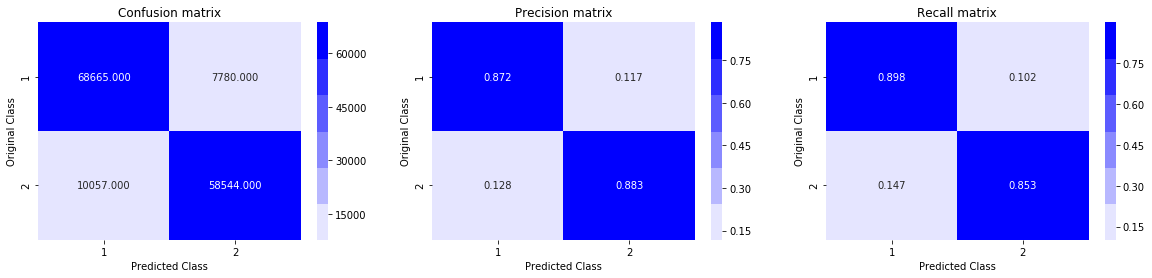

In [266]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [269]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.1
params['n_estimators'] = 500
params['silent'] = 1
params['max_depth'] = 15
params['nthread'] = -1

d_train = xgb.DMatrix(Xtrain_data, label=y_train)
d_test = xgb.DMatrix(Xtest_data, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(Xtrain_data,y_train)
predict_y = bst.predict(d_test)

[0]	train-logloss:0.631114	valid-logloss:0.635605
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.345919	valid-logloss:0.383138
[20]	train-logloss:0.258382	valid-logloss:0.316965
[30]	train-logloss:0.223984	valid-logloss:0.294675
[40]	train-logloss:0.208997	valid-logloss:0.286172
[50]	train-logloss:0.202375	valid-logloss:0.282564
[60]	train-logloss:0.197194	valid-logloss:0.280015
[70]	train-logloss:0.193778	valid-logloss:0.278403
[80]	train-logloss:0.19108	valid-logloss:0.277148
[90]	train-logloss:0.188245	valid-logloss:0.275965
[100]	train-logloss:0.186281	valid-logloss:0.275116
[110]	train-logloss:0.183473	valid-logloss:0.273874
[120]	train-logloss:0.181836	valid-logloss:0.273204
[130]	train-logloss:0.18033	valid-logloss:0.27262
[140]	train-logloss:0.17869	valid-logloss:0.272096
[150]	train-logloss:0.177419	valid-logloss:0.271538
[160]	train-logloss:0.175467	val

In [270]:
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

The test log loss is: 0.2618008510061377


In [271]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predict_y)

0.9565282074978692

Total number of data points : 145046


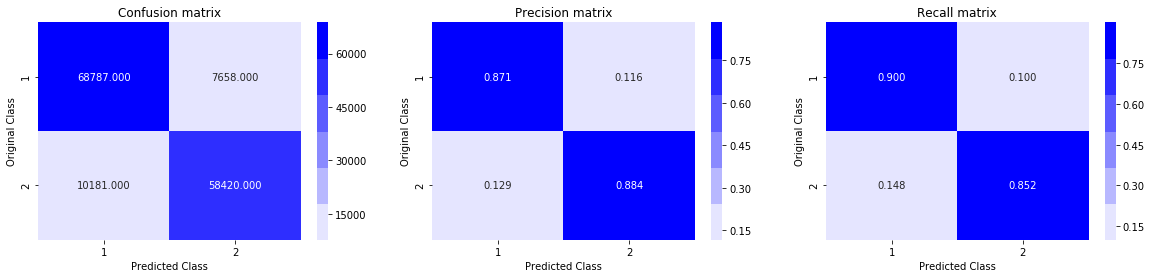

In [272]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [274]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.1
params['n_estimators'] = 500
params['silent'] = 1
params['max_depth'] = 7
params['nthread'] = -1

d_train = xgb.DMatrix(Xtrain_data, label=y_train)
d_test = xgb.DMatrix(Xtest_data, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(Xtrain_data,y_train)
predict_y = bst.predict(d_test)

[0]	train-logloss:0.639445	valid-logloss:0.639656
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.400228	valid-logloss:0.402331
[20]	train-logloss:0.336002	valid-logloss:0.339825
[30]	train-logloss:0.312823	valid-logloss:0.317792
[40]	train-logloss:0.30216	valid-logloss:0.308324
[50]	train-logloss:0.295302	valid-logloss:0.302688
[60]	train-logloss:0.291135	valid-logloss:0.299429
[70]	train-logloss:0.287705	valid-logloss:0.296897
[80]	train-logloss:0.285297	valid-logloss:0.295207
[90]	train-logloss:0.282565	valid-logloss:0.293355
[100]	train-logloss:0.280803	valid-logloss:0.292261
[110]	train-logloss:0.279206	valid-logloss:0.291271
[120]	train-logloss:0.275765	valid-logloss:0.28885
[130]	train-logloss:0.274091	valid-logloss:0.287858
[140]	train-logloss:0.272871	valid-logloss:0.287157
[150]	train-logloss:0.271477	valid-logloss:0.286262
[160]	train-logloss:0.269641	v

In [275]:
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

The test log loss is: 0.27199490870250403


In [276]:
roc_auc_score(y_test,predict_y)

0.953484294410321

Total number of data points : 145046


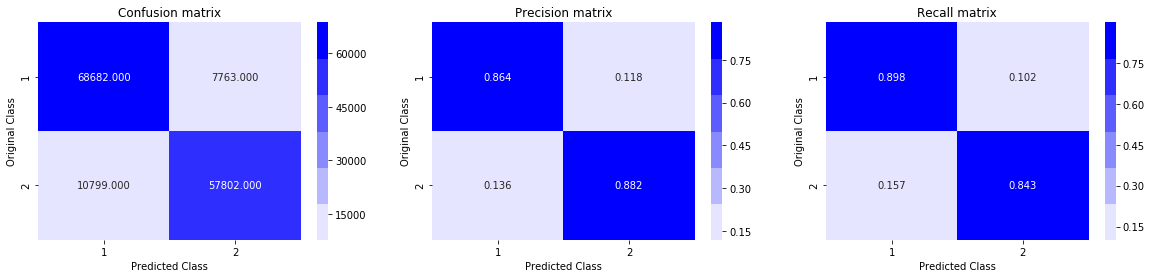

In [277]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [2]:
from prettytable import PrettyTable 

x = PrettyTable()

x.field_names = ['Featurization','train_loss','test_loss']
x.add_row(['LR','0.386','0.5'])
x.add_row(['SVC','0.521','0.567'])
x.add_row(['Xgboost','0.27','0.34'])

print (x)

+---------------+------------+-----------+
| Featurization | train_loss | test_loss |
+---------------+------------+-----------+
|       LR      |   0.386    |    0.5    |
|      SVC      |   0.521    |   0.567   |
|    Xgboost    |    0.27    |    0.34   |
+---------------+------------+-----------+


## conclusion

Xgboost is having least test loss, and the difference between train and test loss is high which means model is overfitting.
But, has good precision and recall values compared to tfidfw2v. we can reduce the loss, by tuning more parameters.